In [2]:
import os
import pyfits
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [3]:
files=[item for item in os.listdir('data/B2.5/') if item.startswith('ALI')]

In [4]:
Ali_Sci_Images=[]
adinfo=[]
for i in files:
    n=pyfits.open('data/B2.5/'+i)
    Ali_Sci_Images+=[n[0].data]
    adinfo+=[np.loadtxt('info/'+i[:-5]+'.inf')] # info: 'Center_x_new','Center_y_new','Orientation'

In [24]:
n.close()

In [5]:
era=np.median(Ali_Sci_Images, axis=0)

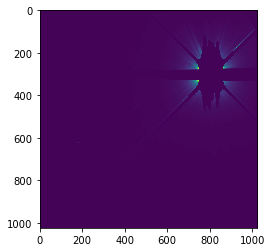

In [25]:
plt.imshow(era)

In [78]:
subs=[i-era for i in Ali_Sci_Images] 

In [63]:
subs=[cv2.subtract(i,era) for i in Ali_Sci_Images] 

In [120]:
maxw=len(era)
maxw=1500

In [121]:
dst=np.zeros((maxw,maxw))
for ainf,sub in zip(adinfo,subs):
    canvas=np.zeros((maxw,maxw))
    canvas[maxw-len(sub):maxw,:len(sub)]=sub
    # info: 'Center_x_new','Center_y_new','Orientation'
    cx=int(round(ainf[0]))
    cy=int(round(ainf[1])+maxw-len(sub))
    M = cv2.getRotationMatrix2D((cx,cy),-ainf[2],1)
    print(canvas.min())
    dst += cv2.warpAffine(canvas,M,canvas.shape)/len(subs)


In [122]:
sdst=np.zeros((maxw,maxw))
for ainf,sub in zip(adinfo,subs):
    canvas=np.zeros((maxw,maxw))
    canvas[maxw-len(sub):maxw,:len(sub)]=sub
    # info: 'Center_x_new','Center_y_new','Orientation'
    cx=int(round(ainf[0]))
    cy=int(round(ainf[1])+maxw-len(sub))
    M = cv2.getRotationMatrix2D((cx,cy),-ainf[2],1)
    sdst += (cv2.warpAffine(canvas,M,canvas.shape)-dst)**2/len(subs)

sdst=np.sqrt(sdst)

In [133]:
dst2=np.zeros((maxw,maxw))
for ainf,sub in zip(adinfo,subs):
    canvas=np.zeros((maxw,maxw))
    canvas[maxw-len(sub):maxw,:len(sub)]=sub
    # info: 'Center_x_new','Center_y_new','Orientation'
    cx=int(round(ainf[0]))
    cy=int(round(ainf[1])+maxw-len(sub))
    M = cv2.getRotationMatrix2D((cx,cy),-ainf[2],1)
    R = cv2.warpAffine(canvas,M,canvas.shape)
    dst2 += R*(dst-sdst<R)*(R<(dst+sdst))

In [124]:
(dst==dst2).all()

False

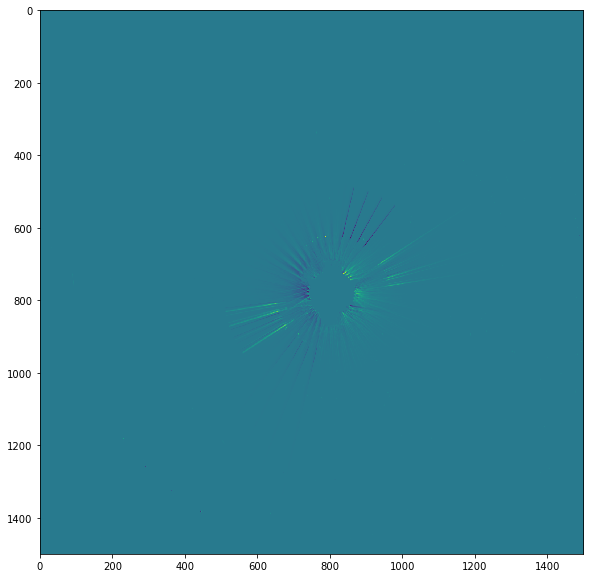

In [125]:
plt.figure(figsize=(10,10))
plt.imshow(dst)

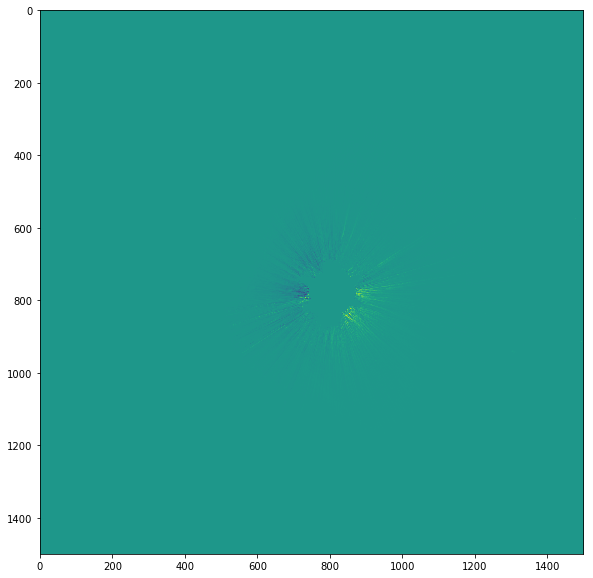

In [134]:
plt.figure(figsize=(10,10))
plt.imshow(dst2)

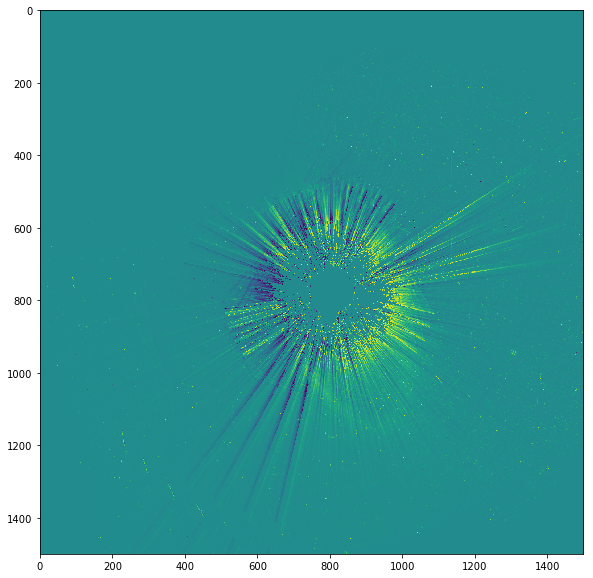

In [141]:
plt.figure(figsize=(10,10))
plt.imshow(dst*((dst.mean()-dst.std())<dst)*(dst<(dst.mean()+dst.std())))

In [148]:
dst3=dst*((dst.mean()-dst.std())<dst)*(dst<(dst.mean()+dst.std()))

In [149]:
plt.imsave("disk.png",dst3)

In [142]:
rm rot_Ali_Sci.fits rot_Ali_Sci_C_s.fits rot_Ali_Sci_c_sP.fits

In [143]:
pyfits.writeto('rot_Ali_Sci.fits', dst)

In [144]:
pyfits.writeto('rot_Ali_Sci_C_s.fits', dst*(dst<(dst.mean()+dst.std())))

In [145]:
pyfits.writeto('rot_Ali_Sci_C_sP.fits', dst2)

In [119]:
dst2.min()

-40500.610387086497